c:\Users\Usuario\miniforge3\envs\atp\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
22:52:35|ATP-WARNING| UMAP works best with larger datasets. Only 8 points available.


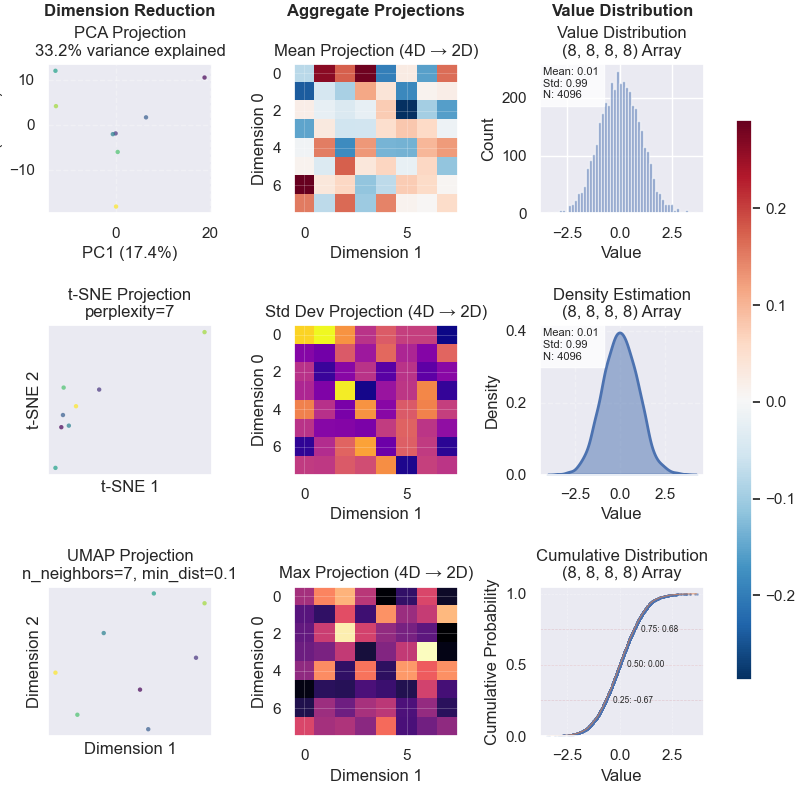

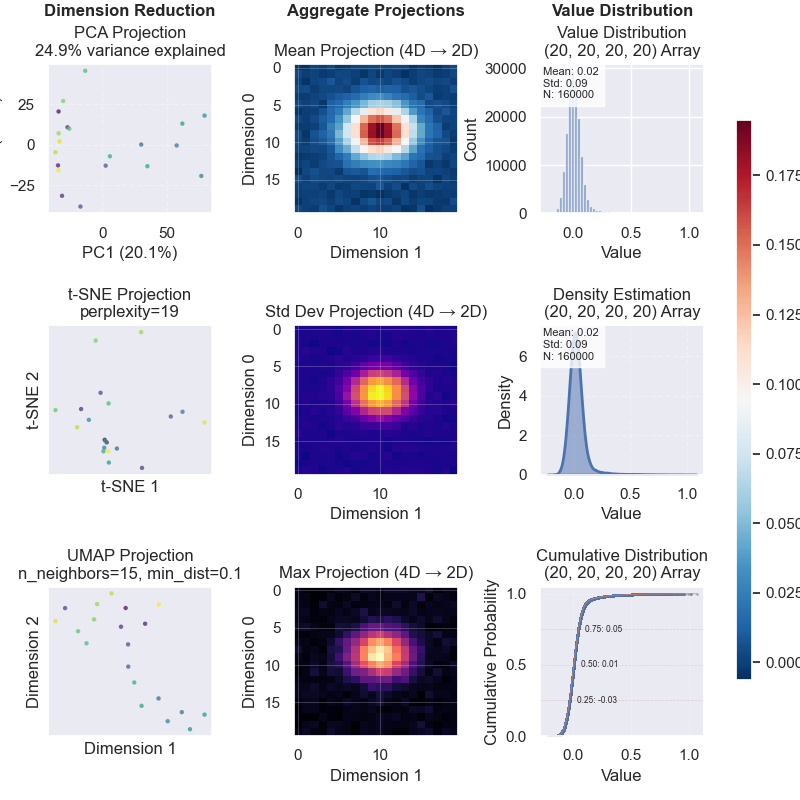

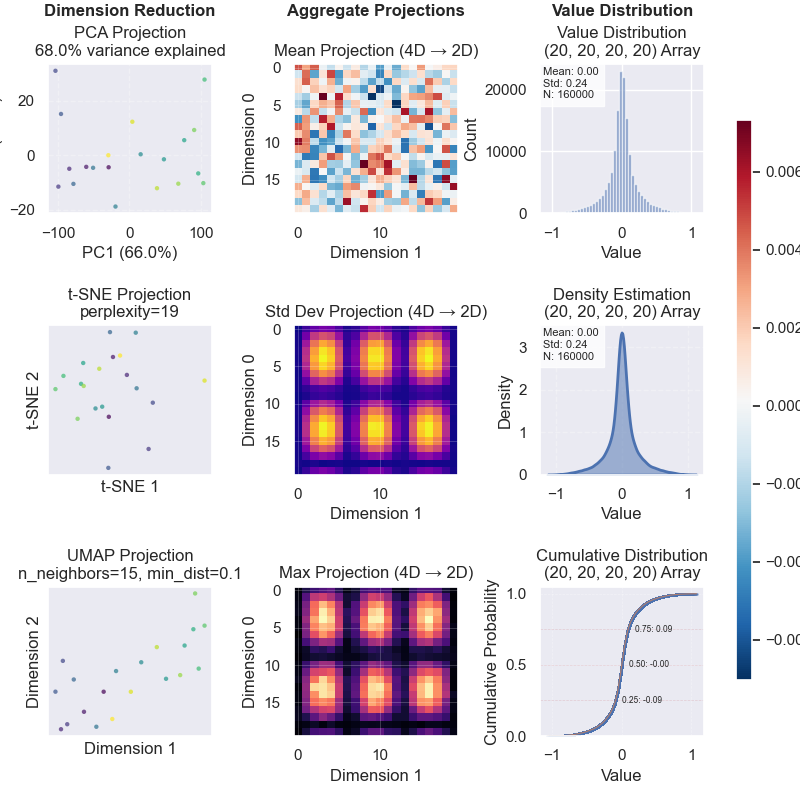

22:52:50|ATP-WARNING| UMAP works best with larger datasets. Only 10 points available.


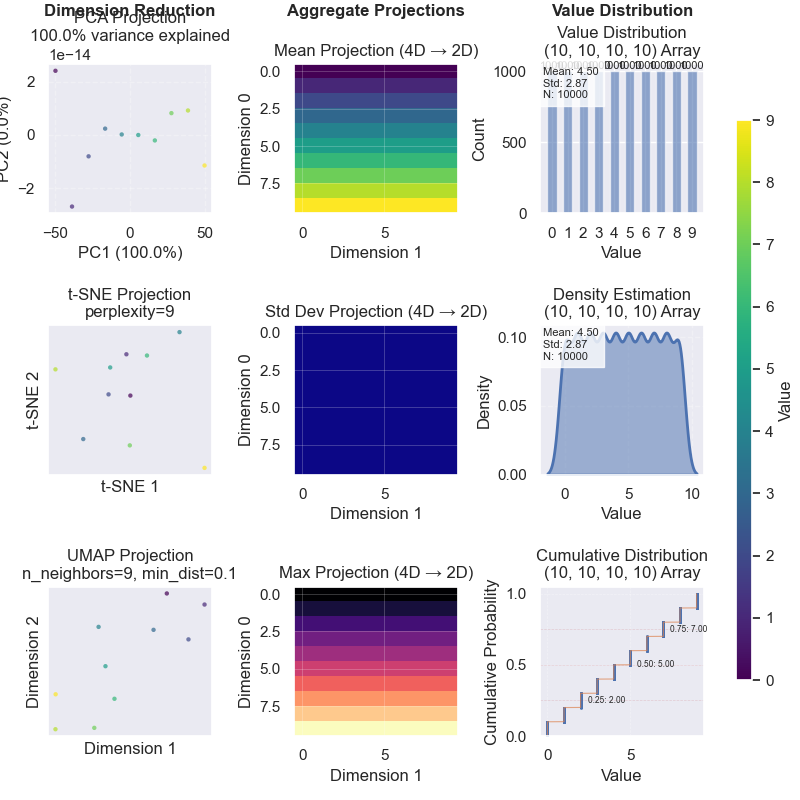

22:52:52|ATP-WARNING| UMAP works best with larger datasets. Only 5 points available.


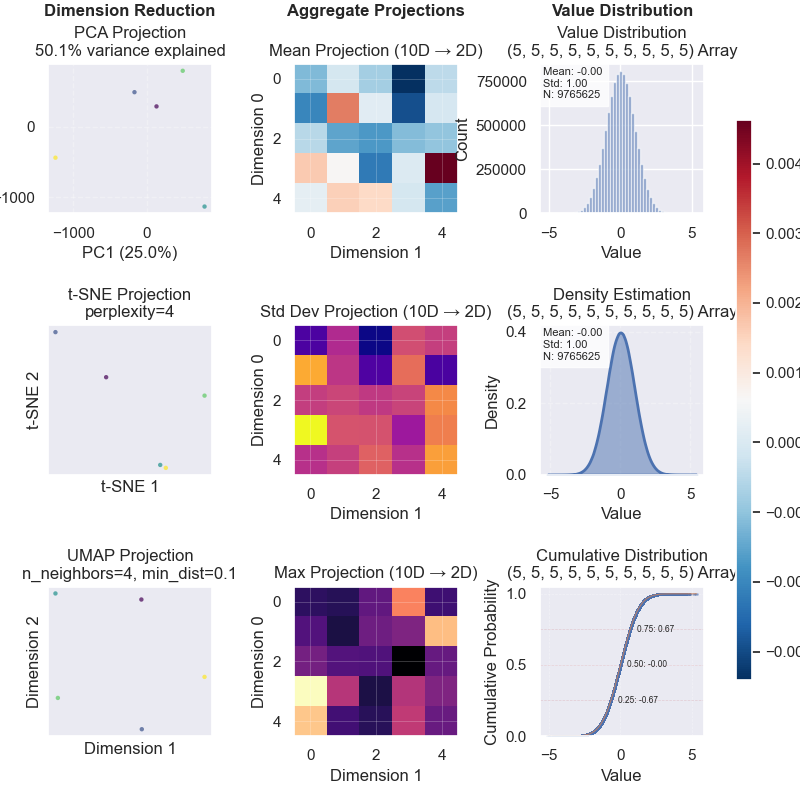

22:53:32|ATP-ERROR| Failed to create UMAP projection: Too few data points for UMAP (got 2, need at least 5)


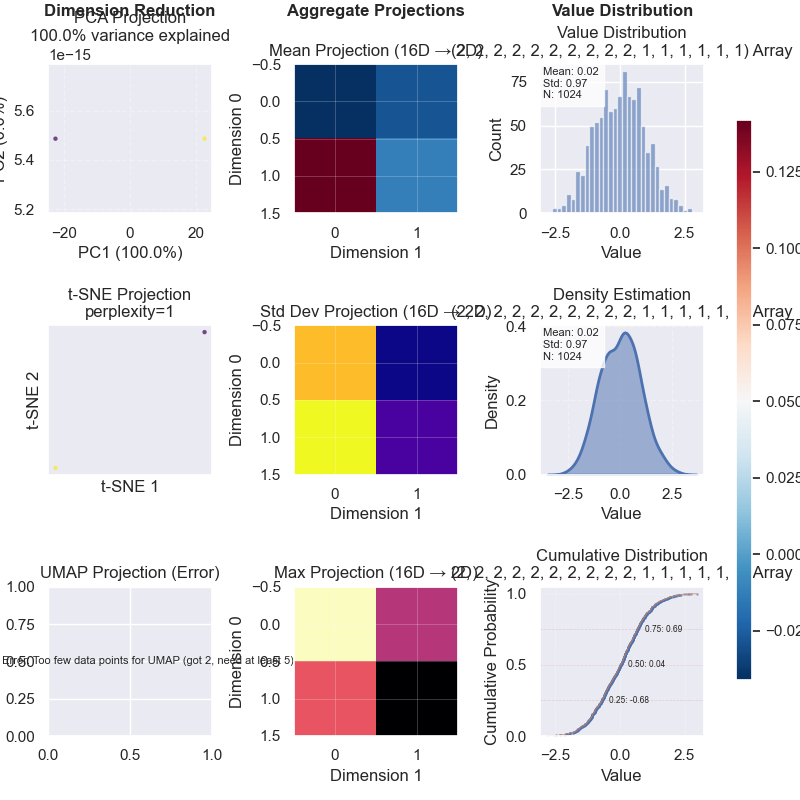

In [1]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')  # Adjust this if needed
import numpy as np
from alltheplots import plot, set_log_level
from IPython.display import display, Image
import seaborn as sns
import matplotlib.pyplot as plt

set_log_level('WARNING')
# Set a dark background theme
sns.set_theme(style="ticks", palette="deep")
plt.style.use("dark_background")
sns.set_theme(style="darkgrid", palette="deep")


def gaussian_4d_mod(resolution=20, sigma=(0.5, 0.6, 0.7, 0.8), offset=(0.2, -0.1, 0.1, 0.0), size=2, noise_level=0.05):
    x = np.linspace(-size, size, resolution) + offset[0]
    y = np.linspace(-size, size, resolution) + offset[1]
    z = np.linspace(-size, size, resolution) + offset[2]
    w = np.linspace(-size, size, resolution) + offset[3]
    xx, yy, zz, ww = np.meshgrid(x, y, z, w, indexing='ij')
    gauss = np.exp(-((xx**2)/(2*sigma[0]**2) + (yy**2)/(2*sigma[1]**2) + (zz**2)/(2*sigma[2]**2) + (ww**2)/(2*sigma[3]**2)))
    noise = np.random.normal(scale=noise_level, size=gauss.shape)
    return gauss + noise

def sine_4d_mod(resolution=20, freq=(1, 1.5, 2, 2.5), phase=(0.1, 0.2, 0.3, 0.4), offset=(0.2, -0.2, 0.1, 0.0), size=2*np.pi, noise_level=0.05):
    x = np.linspace(0, size, resolution) * freq[0] + offset[0]
    y = np.linspace(0, size, resolution) * freq[1] + offset[1]
    z = np.linspace(0, size, resolution) * freq[2] + offset[2]
    w = np.linspace(0, size, resolution) * freq[3] + offset[3]
    xx, yy, zz, ww = np.meshgrid(x, y, z, w, indexing='ij')
    s = np.sin(xx + phase[0]) * np.sin(yy + phase[1]) * np.sin(zz + phase[2]) * np.sin(ww + phase[3])
    noise = np.random.normal(scale=noise_level, size=s.shape)
    return s + noise

def ramp_4d(resolution=10):
    arr = np.zeros((resolution, resolution, resolution, resolution))
    for i in range(resolution):
        arr[i, :, :, :] = i
    return arr

def array_5d():
    # Create a 5d array with shape (5,)*10 (total elements = 5^10 = 9765625)
    return np.random.randn(*(5,)*10)

def array_16d():
    # Create a 16D array with shape (2,)*10 + (1,)*90 (total elements = 2^10 = 1024)
    shape = (2,)*10 + (1,)*6
    return np.random.randn(*shape)

# Define arrays for 4D testing
arrays_4d = [
    np.random.randn(8, 8, 8, 8),
    gaussian_4d_mod(),
    sine_4d_mod(),
    ramp_4d()
]

# Plot and display 4D arrays
for idx, arr in enumerate(arrays_4d):
    filename = f"plot_nd_4d_{idx}.png"
    plot(arr, filename=filename, dpi=100, show=False)
    display(Image(filename))

# Plot and display a 5d array
arr_5d = array_5d()
plot(arr_5d, filename="plot_nd_10d.png", dpi=100, show=False)
display(Image("plot_nd_10d.png"))

# Plot and display a 16D array
arr_16d = array_16d()
plot(arr_16d, filename="plot_nd_100d.png", dpi=100, show=False)
display(Image("plot_nd_100d.png"))

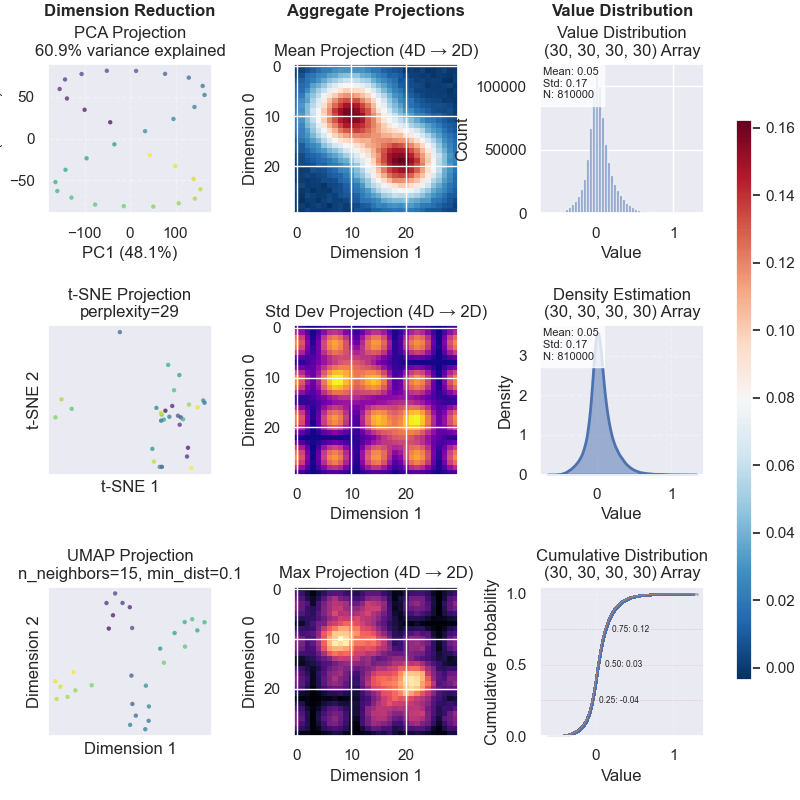

In [2]:
def complex_topology_4d(resolution=30, noise_level=0.05):
    """
    Generate a 4D composite array with non-uniform, locally varying topology.
    Combines two Gaussian bumps at different centers with an oscillatory sine-cosine modulation.
    """
    x = np.linspace(-3, 3, resolution)
    y = np.linspace(-3, 3, resolution)
    z = np.linspace(-3, 3, resolution)
    w = np.linspace(-3, 3, resolution)
    xx, yy, zz, ww = np.meshgrid(x, y, z, w, indexing='ij')
    
    # Two Gaussian bumps centered at (-1,-1,-1,-1) and (1,1,1,1)
    g1 = np.exp(-(((xx + 1)**2 + (yy + 1)**2 + (zz + 1)**2 + (ww + 1)**2) / 2.0))
    g2 = np.exp(-(((xx - 1)**2 + (yy - 1)**2 + (zz - 1)**2 + (ww - 1)**2) / 2.0))
    
    # Oscillatory component for local variations
    sine_component = np.sin(2 * xx) * np.cos(2 * yy) * np.sin(2 * zz) * np.cos(2 * ww)
    
    # Composite field: add Gaussian bumps and modulate with the sine wave; add some noise for extra texture
    composite = g1 + g2 + 0.5 * sine_component
    composite += np.random.normal(scale=noise_level, size=composite.shape)
    return composite

# Create a composite 4D array with interesting topology
data_complex = complex_topology_4d()

# Also create a random 4D array for comparison
data_random = np.random.randn(30, 30, 30, 30)

# Plot both arrays using alltheplots, saving the plots to files
plot(data_complex, filename="complex_topology_4d.png", dpi=100, show=False)

# Display the resulting images
display(Image("complex_topology_4d.png"))